### Importing essential libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The factors that might affect the health insurance cost are:-

Age: Age of the beneficiary

Sex: Gender of the beneficiary

BMI: Body Mass Index (kg / m^2)

Children: Number of children / Number of dependants

Smoker: Does smoke or not

Region: Residential area of the beneficiary

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Exploratory Data Analysis:

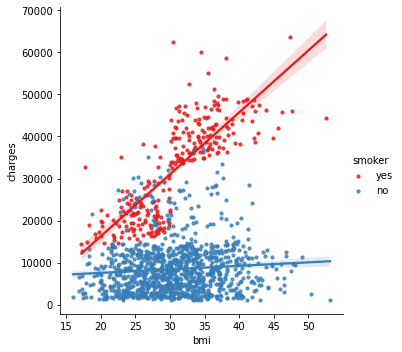

In [6]:
sns.lmplot( x='bmi',y='charges', data=df, hue='smoker', palette='Set1', scatter_kws={"s": 10})
plt.show()

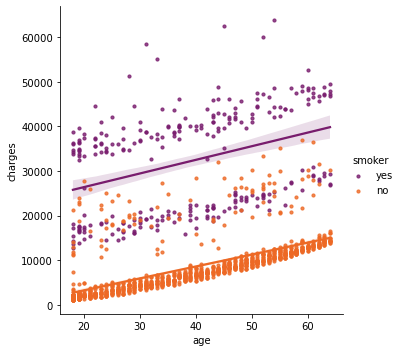

In [7]:
sns.lmplot(x='age', y='charges', hue='smoker', data=df, palette='inferno', scatter_kws={"s": 10})
plt.show()

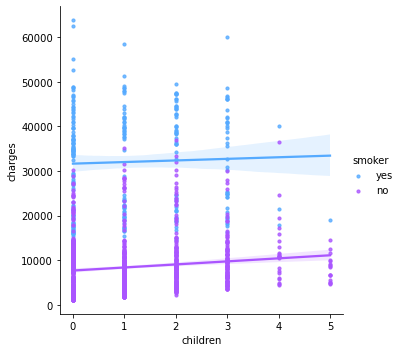

In [8]:
sns.lmplot(x='children', y='charges', hue='smoker', data=df, palette='cool', scatter_kws={"s": 10})
plt.show()

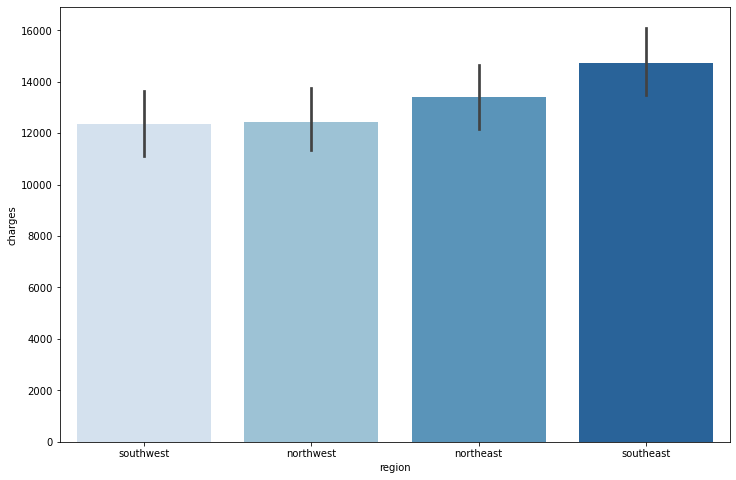

In [9]:
f, axs = plt.subplots(1,1, figsize=(12,8))
plot_order = df.groupby('region')['charges'].sum().sort_values(ascending=True).index.values
sns.barplot(x='region', y='charges', data=df, palette='Blues', order=plot_order)
plt.show()

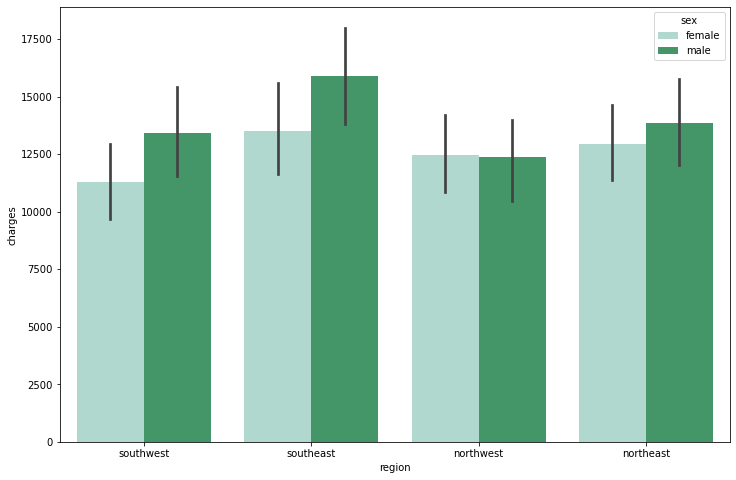

In [10]:
f, axs = plt.subplots(1,1, figsize=(12,8))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='BuGn')
plt.show()

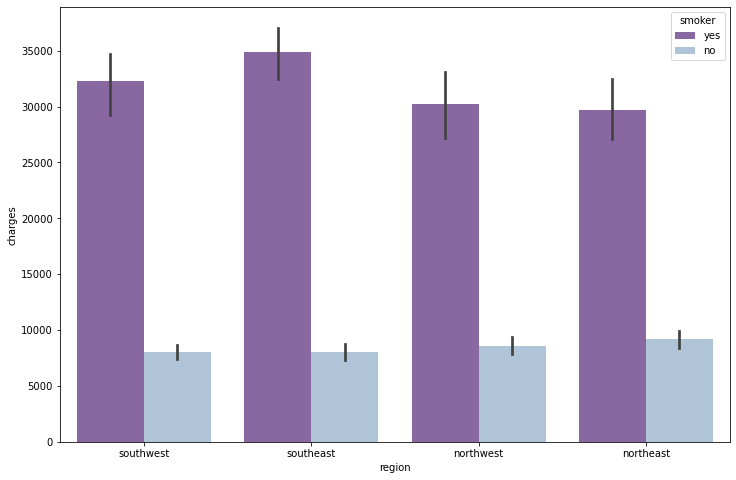

In [11]:
f, axs = plt.subplots(1,1, figsize=(12,8))
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='BuPu_r')
plt.show()

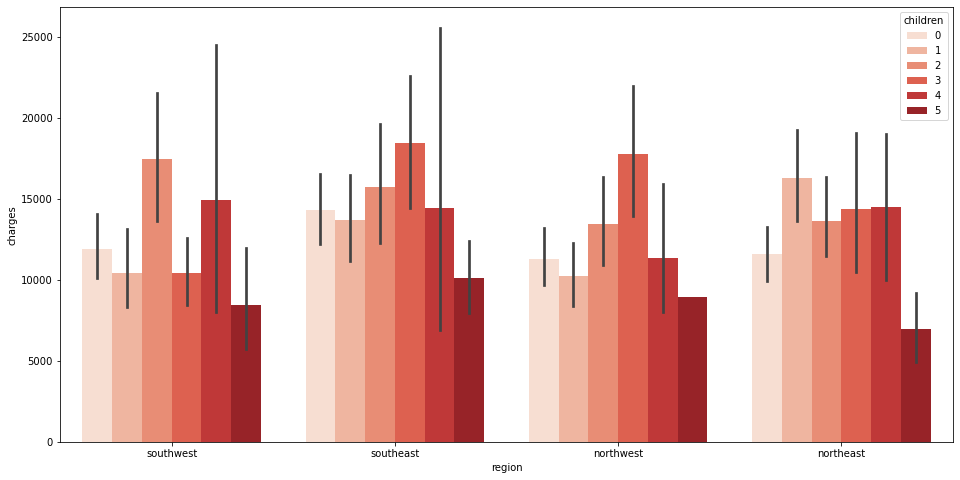

In [12]:
f, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Reds')
plt.show()

### Modifying the data for prediction

In [13]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

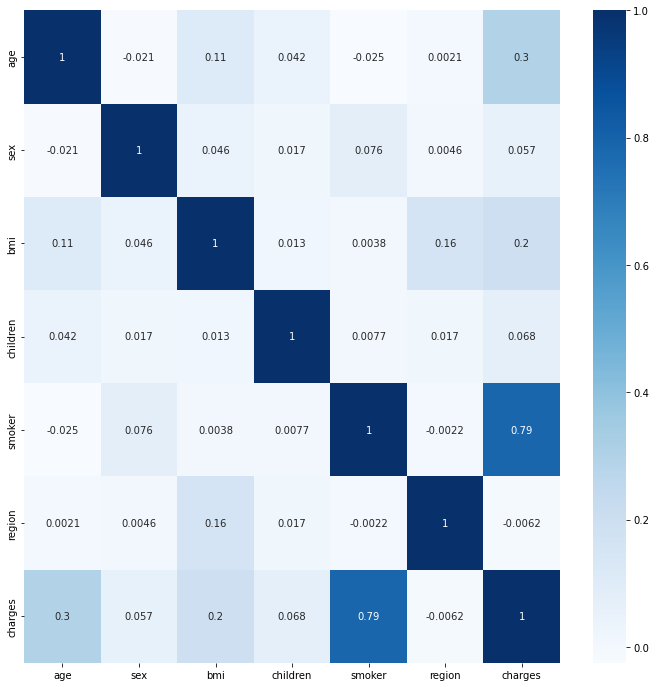

In [15]:
f, axs = plt.subplots(1,1, figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [16]:
df['region'].unique()

array([3, 2, 1, 0])

Region 0 -> Northeast

Region 1 -> Northwest

Region 2 -> Southeast

Region 3 -> Southwest

### Multiple linear regression.

In [17]:
X = np.array(df.iloc[:,:-1])
y = np.array(df.iloc[:,-1])  

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [19]:
X.shape, y.shape

((1338, 6), (1338,))

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1003, 6), (335, 6), (1003, 1), (335, 1))

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [22]:
y_predict = reg.predict(X_test)

In [23]:
accuracy = reg.score(X_test, y_test)
print('Accuracy = ', accuracy)

Accuracy =  0.7962732059725786


In [24]:
from sklearn.linear_model import Ridge
r = Ridge(alpha=0.5)
r.fit(X_train, y_train)

Ridge(alpha=0.5)

In [25]:
ridge_accuracy = r.score(X_test, y_test)
print('Accuracy = ', ridge_accuracy)

Accuracy =  0.7961319557404142


In [26]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor as rfr
rf_reg = rfr(n_estimators = 10,random_state = 0)

rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1003, 6), (335, 6), (1003, 1), (335, 1))

In [28]:
accuracy = rf_reg.score(X_test, y_test)
print(f'Accuracy : {accuracy:.3}')

Accuracy : 0.86


In [29]:
model=['Linear regression','Ridge','Random forest']
score=[0.796,0.796,0.86]

In [30]:
Results=pd.DataFrame({'Model':model,'Score':score})
Result=Results.sort_values(by='Score',ascending=False)
Result=Result.set_index('Score')
Result

,Model
Score,
0.860,Random forest
0.796,Linear regression
0.796,Ridge
